**Question 1: Extracting Tesla Stock Data Using yfinance**


In [21]:

import yfinance as yf

tesla = yf.Ticker("TSLA")
# Extract historical stock data
tesla_data = tesla.history(period="max")
# Reset the index to make 'Date' a column instead of index
tesla_data.reset_index(inplace=True)
# Save the DataFrame to CSV
tesla_data.to_csv("E:/NEU SLIDE/PYTHON/tesla.csv", index=False)
# Display the first 5 rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


**Question 2: Extracting Tesla Revenue Data Using Webscraping**

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument("--headless") 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)
time.sleep(5) 

html_data = driver.page_source
driver.quit()

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table", {"class": "historical_data_table"})

annual_table = tables[0]

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

rows = annual_table.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            tesla_revenue = pd.concat(
                [tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                ignore_index=True
            )

tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

print(tesla_revenue.tail())


    Date  Revenue
11  2013     2013
12  2012      413
13  2011      204
14  2010      117
15  2009      112


**Question 3: Extracting GameStop Stock Data Using yfinance**

In [19]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.to_csv("E:/NEU SLIDE/PYTHON/gme.csv", index=False)
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


**Question 4: Extracting GameStop Revenue Data Using Webscraping**

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument("--headless") 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
driver.get(url)
time.sleep(5) 

html_data = driver.page_source
driver.quit()

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table", {"class": "historical_data_table"})

annual_table = tables[0]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

rows = annual_table.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            gme_revenue = pd.concat(
                [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                ignore_index=True
            )

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

print(gme_revenue.tail())


    Date  Revenue
12  2013     8887
13  2012     9551
14  2011     9474
15  2010     9078
16  2009     8806


**Question 5: Tesla Stock and Revenue Dashboard**

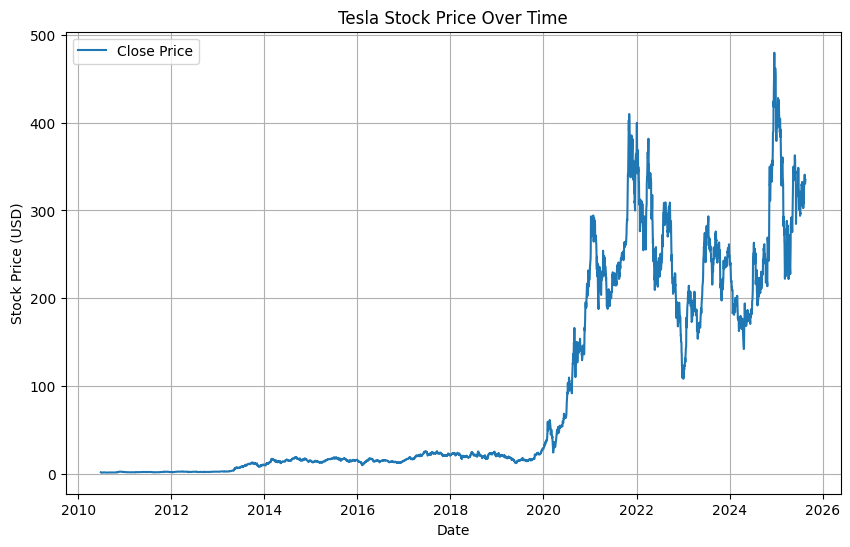

In [ ]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")

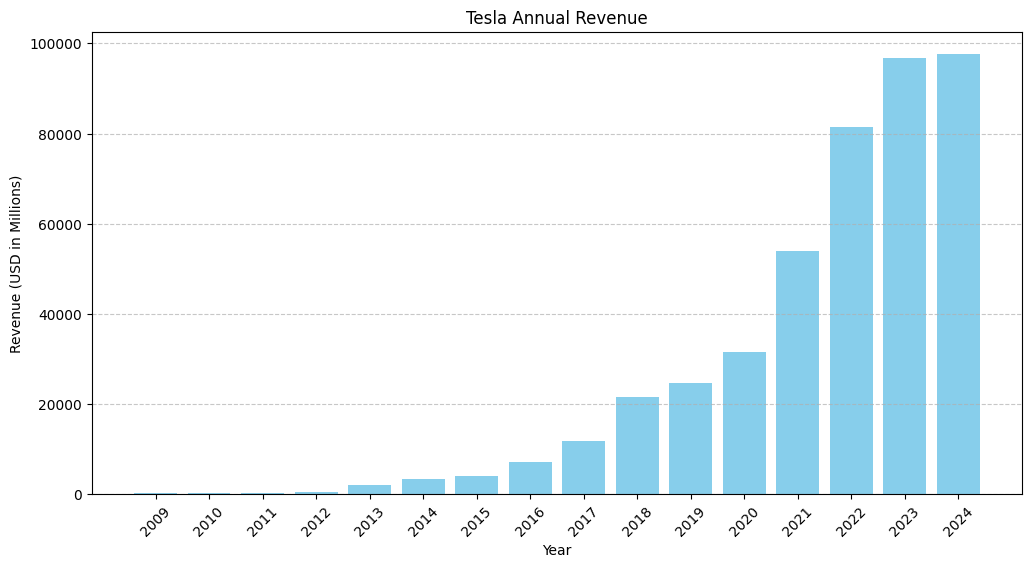

In [ ]:
tesla_revenue = tesla_revenue.sort_values(by="Date", ascending=True)
tesla_revenue.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12,6))
plt.bar(tesla_revenue["Date"], tesla_revenue["Revenue"], color="skyblue")
plt.xlabel("Year")
plt.ylabel("Revenue (USD in Millions)")
plt.title("Tesla Annual Revenue")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Question 6: GameStop Stock and Revenue Dashboard**

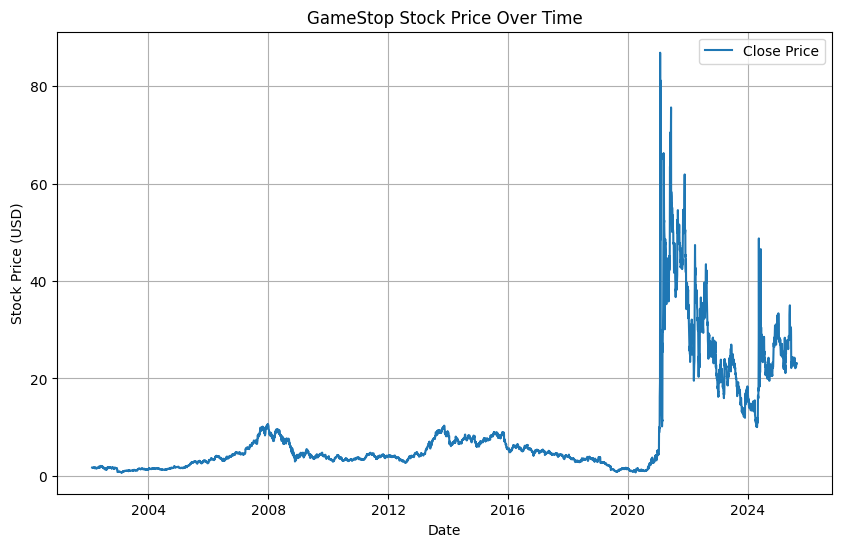

In [36]:
def make_graph(stock_data, title):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(gme_data, "GameStop Stock Price Over Time")

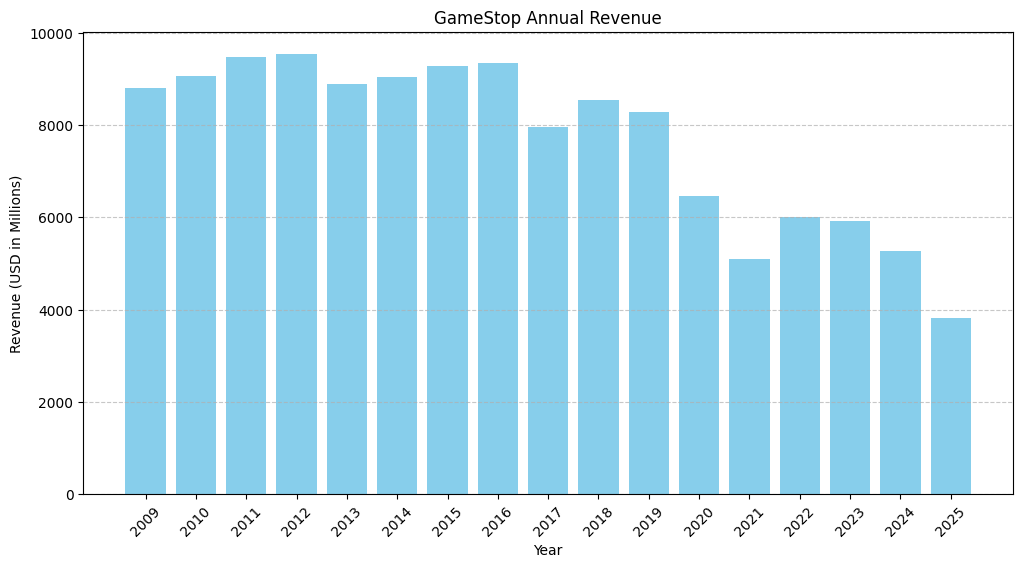

In [35]:
gme_revenue = gme_revenue.sort_values(by="Date", ascending=True)
gme_revenue.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12,6))
plt.bar(gme_revenue["Date"], gme_revenue["Revenue"], color="skyblue")
plt.xlabel("Year")
plt.ylabel("Revenue (USD in Millions)")
plt.title("GameStop Annual Revenue")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()